In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Import modules


In [4]:
## import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

## Loading the dataset

In [5]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## statistical info


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Datatype info

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis // Root Cause Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

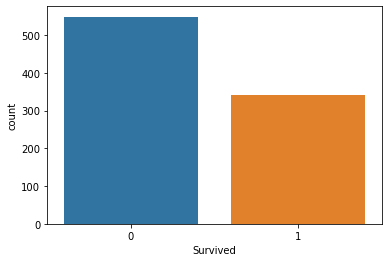

In [8]:
## categorical attributes
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

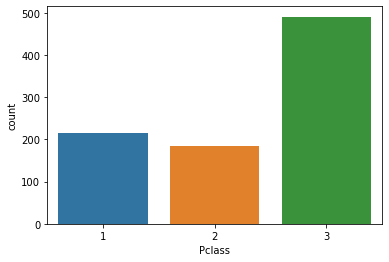

In [9]:
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

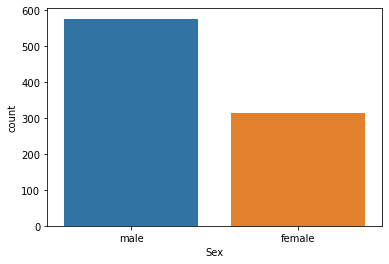

In [10]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

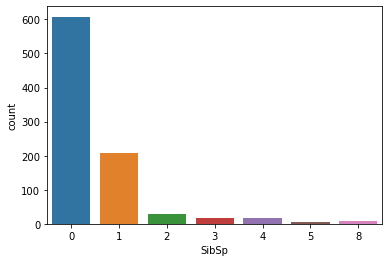

In [11]:
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

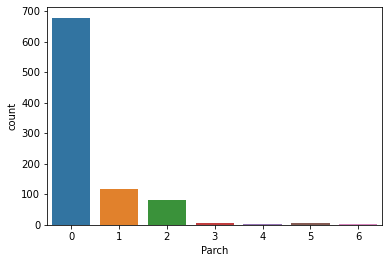

In [12]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

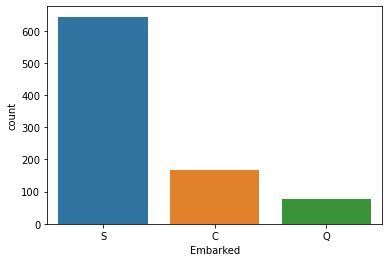

In [13]:
sns.countplot(train['Embarked'])

## Numerical Attributes 

<AxesSubplot:xlabel='Age', ylabel='Density'>

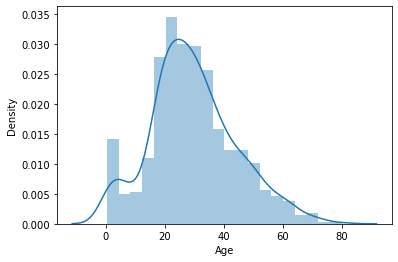

In [14]:
sns.distplot(train['Age']) ## clear bell curve   distplot is used for numerical analysis

<AxesSubplot:xlabel='Fare', ylabel='Density'>

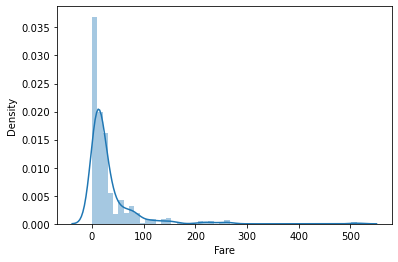

In [15]:
sns.distplot(train['Fare']) ## distplot is used for numerical analysis
               ## it is a right skewed graph

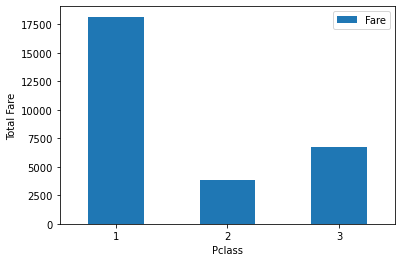

In [16]:
class_fare=train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)## by default-mean function 
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

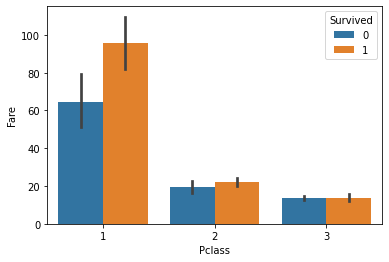

In [17]:
sns.barplot(data=train,x='Pclass',y='Fare',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

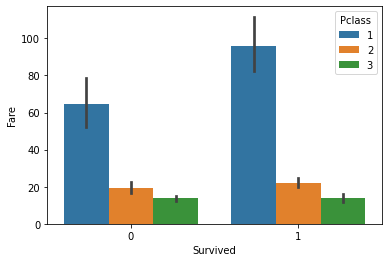

In [18]:
sns.barplot(data=train,x='Survived',y='Fare',hue='Pclass')

## Data Preprocessing

In [19]:
## finding the length of the data
train_len=len(train)
## combine two dataframes
df=pd.concat([train,test],axis=0)
df=df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
## find the null values\
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Drop/Delete the unwanted Column in the dataset 

In [22]:
df=df.drop(columns=['Cabin'],axis=1)

## Fill missing values using mean of that column (numerical values)

In [23]:
df['Age']=df['Age'].fillna(df['Age'].mean()) 
df['Fare']=df['Fare'].fillna(df['Fare'].mean())                                              ## fill the missing values by fillna function 

## Fill Missing values using mode of that column (categorical values)

In [24]:
df['Embarked'].mode()[0] ## categorical values are filled with mode

'S'

In [25]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])## categorical values are filled with mode

## log transformation for uniform data distribution - to convert right skewed graph into uniform distribution of the graph 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

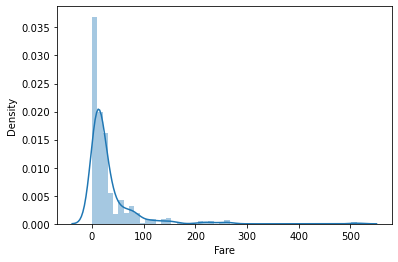

In [26]:
sns.distplot(train['Fare'])

In [27]:
df['Fare']=np.log(df['Fare']+1)  

<AxesSubplot:xlabel='Fare', ylabel='Density'>

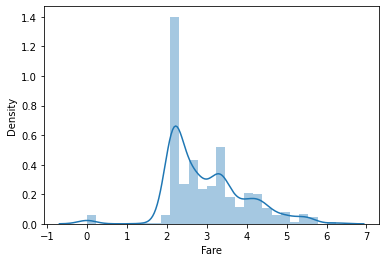

In [28]:
sns.distplot(df['Fare'])  ## not a perfect uniform distribution 

## Correlation matrix

<AxesSubplot:>

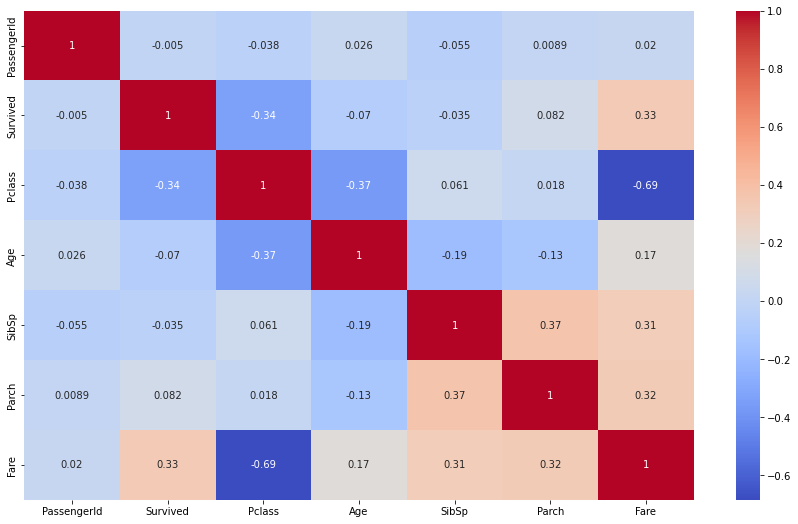

In [29]:
corr=df.corr()  ## positive correlation and negative correlation 
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


## DROP UNWANTED COLUMNS 

In [31]:
df=df.drop(columns=['Name','Ticket'],axis=1)
df.head()                              ## drop by columns[axis=1],drop by rows[axis=0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


## Label Encoding 

In [32]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## Train & Test split (data validation )

In [33]:
train=df.iloc[: train_len,:]
test=df.iloc[train_len,:]

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [35]:
test.head()

PassengerId    892.0
Survived         NaN
Pclass           3.0
Sex              1.0
Age             34.5
Name: 891, dtype: float64

## Input split

In [36]:
x=train.drop(columns=['PassengerId','Survived'],axis=1)
y=train['Survived']

In [37]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


## Model Training for exploration 

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score
def classify(model):
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy:',model.score(x_test,y_test))
    
    
    score=cross_val_score(model,x,y)
    print(score)
    print('CV score:',np.mean(score))
    
    

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
CV score: 0.7833971502102819


In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model)

Accuracy: 0.7309417040358744
[0.73184358 0.76404494 0.80337079 0.74157303 0.79775281]
CV score: 0.7677170296905405


In [41]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model)

Accuracy: 0.8161434977578476
[0.77653631 0.79775281 0.85393258 0.7752809  0.84831461]
CV score: 0.8103634423451134


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model)

Accuracy: 0.8116591928251121
[0.75977654 0.7752809  0.83146067 0.76404494 0.80337079]
CV score: 0.7867867679367271


In [43]:
from xgboost import XGBClassifier
model=XGBClassifier()
classify(model)

Accuracy: 0.7892376681614349
[0.7877095  0.81460674 0.84269663 0.78651685 0.83146067]
CV score: 0.8125980792166217


In [44]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
classify(model)

Accuracy: 0.8116591928251121
[0.79329609 0.81460674 0.86516854 0.79775281 0.84831461]
CV score: 0.8238277572029377


In [45]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8295964125560538
[0.81564246 0.79775281 0.84831461 0.79775281 0.85393258]
CV score: 0.8226790534178645


## complete model training with full data

In [46]:
model=LGBMClassifier()
model.fit(x,y)


LGBMClassifier()

In [47]:
test.head()

PassengerId    892.0
Survived         NaN
Pclass           3.0
Sex              1.0
Age             34.5
Name: 891, dtype: float64

In [48]:
x_test=test.drop(columns=['PassengerId','Survived'],axis=1)


In [49]:
x_test.head()


PassengerId    892.0
Survived         NaN
Pclass           3.0
Sex              1.0
Age             34.5
Name: 891, dtype: float64

In [57]:
pred=model.predict(x_test)
pred

ValueError: Expected 2D array, got 1D array instead:
array=[892.                  nan   3.           1.          34.5
   0.           0.           2.17806441   1.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## test submission

In [51]:
sub=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [56]:
sub['Survived']=pred

NameError: name 'pred' is not defined

In [53]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
sub.to_csv('submission.csv',index=False)